In [1]:
# This quickly generates a FlareLightCurve
from altaipony.tests.test_flarelc import mock_flc

#Alternatively, use
from altaipony.flarelc import FlareLightCurve

# We shall be testing our code
import pytest 

# The basis
import numpy as np
import pandas as pd

# For plotting diagnostics
import matplotlib.pyplot as plt
%matplotlib inline

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

import matplotlib
matplotlib.rc('font', **font)

# Import our main class
from flarefairy import FlareFairy

/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
# Q-learning parameters that are fixed ad hoc
DISCRETE_OS_SIZE = [20, 20]
LEARNING_RATE = .5
DISCOUNT = .75

In [3]:
# Let's generate a flare light curve to work with

# small size to keep computational effort at bay
n = 300

# time, flux noise
time = np.linspace(20,22,n)
flux = 500. + 15.* np.sin(time*4)
flux_err = flux * .005

# a hand-crafted flare signal
flux[60] = 730
flux[61] = 600
flux[62] = 560
flux[63] = 530
flux[64] = 525
flux[65] = 520
flux[66] = 515
flux[67] = 510

# define FlareLightCurve object
flc = FlareLightCurve(time=time, flux=flux, flux_err=flux_err)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


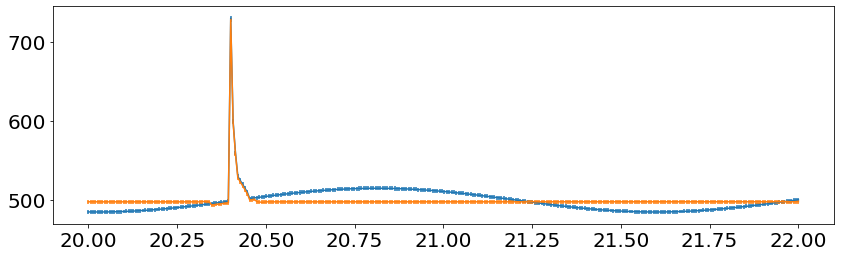

In [4]:
# get de-trended light curve (useful for later)
flcd = flc.detrend("savgol")

# look at the result
plt.figure(figsize=(14,4))
plt.errorbar(flcd.time, flcd.flux, yerr=flcd.flux_err, label="before de-trending");
plt.errorbar(flcd.time, flcd.detrended_flux, yerr=flcd.detrended_flux_err, label="after de-trending");

In [5]:
# Find the flare with AltaiPony
flare = flcd.find_flares().flares.iloc[0]
flare.dropna()

Found 1 candidate(s) in the (0,300) gap.


istart                              60
istop                               68
tstart                         20.4013
tstop                          20.4548
ed_rec                         571.745
ed_rec_err                     5.42846
ampl_rec                      0.462627
dur                          0.0535117
total_n_valid_data_points          300
Name: 0, dtype: object

In [6]:
# Instantiate a fairy
fairy = FlareFairy(flcd, flare)

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


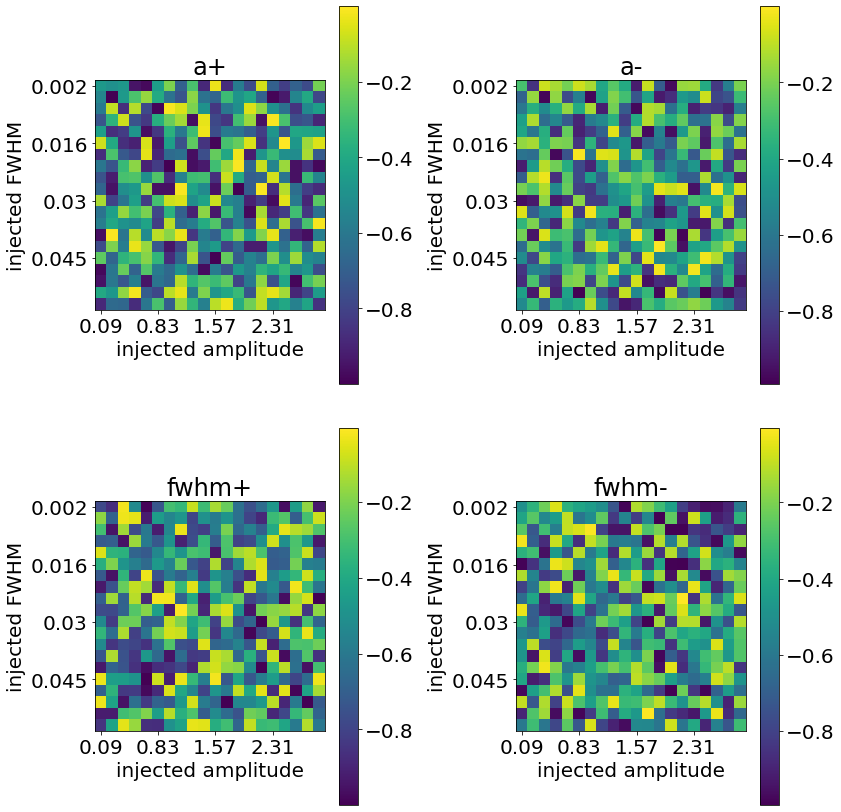

In [7]:
# Show the initial Q-table with the four possible steps
# increment / decrement amplitude
# increment / decrement FWHM

fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes = [_ for a in Axes for _ in a]
for i,la in enumerate(["a+","a-","fwhm+","fwhm-"]):
    
    pos = axes[i].imshow(fairy.q_table[:,:,i])
    axes[i].set_xticks(np.arange(0,fairy.q_table.shape[0],5))
    axes[i].set_xticklabels(np.round(np.linspace(fairy.amin,fairy.amax, fairy.q_table.shape[0]//5),2))
    axes[i].set_yticks(np.arange(0,fairy.q_table.shape[1],5))
    axes[i].set_yticklabels(np.round(np.linspace(fairy.dmin,fairy.dmax, fairy.q_table.shape[1]//5),3))
    axes[i].set_xlabel("injected amplitude")
    axes[i].set_ylabel("injected FWHM")
    axes[i].set_title(la)
    fig.colorbar(pos, ax=axes[i])
plt.tight_layout()

In [8]:
# Now let the fairy find the good flares
end_df = fairy.run_n_episodes(4)

Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

0000000
reward  -0.1828724322591783
currentQ, newQ  -0.8556384560298017 -0.5333454797977187
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.565979262765168
currentQ, newQ  -0.8391253315352801 -0.8113015004272899
0000000
reward  -0.04480853645938017
currentQ, newQ  -0.442108049667281 -0.26530384543725094
0000000


N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.9017332477908605
currentQ, newQ  -0.7417398587583887 -0.9119662779555051
0000000
reward  -0.05782500762001105
currentQ, newQ  -0.9116294367219351 -0.5616749527275341
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.015709421805190825
currentQ, newQ  -0.6327037913945509 -0.36206489527603086
0000000
reward  -0.9225827507411763
currentQ, newQ  -0.11631671948989164 -0.6228093799212326
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.019226068583541832
currentQ, newQ  -0.471895006845505 -0.335790262395404
0000000
reward  -1.0415227214778955
currentQ, newQ  -0.2406125991490149 -0.7564288039335124
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.536272466494941
currentQ, newQ  -0.8339054015649919 -0.7335537611564035
0000000
reward  -0.5210448932890617
currentQ, newQ  -0.491645813035993 -0.6738181353169205
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.5216501752647251
currentQ, newQ  -0.6375545904646507 -0.5943491184876035
0000000
reward  -0.5300855383437898
currentQ, newQ  -0.1261158688738605 -0.4955734857632183
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.5287657788040463
currentQ, newQ  -0.5943491184876035 -0.5763041842687405
0000000
reward  -0.012815753984840018
currentQ, newQ  -0.5324771411866294 -0.34384360574939743
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.5214541835040692
currentQ, newQ  -0.9756357439212501 -0.7687008105761952
0000000
reward  -1.2095547220537193
currentQ, newQ  -0.3122701515345345 -0.9191278348088545
0000000


/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/utils.py:163: RuntimeWarning: invalid value encountered in less
  mhigh[mexc] = a[mexc] - med <  max_sigma * sig #indices of okay values above median
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/utils.py:164: RuntimeWarning: invalid value encountered in greater
  mlow[mexc]  = a[mexc] - med > -max_sigma * sig #indices of okay values below median
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/home/ekaterina/Documents/000_envs/forallpurposes/lib/python3.6/site-packages/altaipony-0.0.1-py3.6.egg/altaipony/altai.py:60: RuntimeWarning: invalid value encountered in greater
  pass_thresholds = np.where((T0 > 0) & (T1 > N1) & (T2 > N2))
Found 0 candidate(s) in

currentQ, newQ  -0.8458530122133424 -0.5947739753514139
0000000
reward  -1.1960711422751595
currentQ, newQ  -0.536301057297355 -1.079396749689058
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|


reward  -1.4895536692683315
currentQ, newQ  -0.787873966188829 -1.26130129086711
0000000
currentQ, newQ  -0.37235914543164284 -0.3693337444554232
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.09003418277896248
currentQ, newQ  -0.8402610713762196 -0.5877351002161206
0000000
reward  -0.46234029513421726
currentQ, newQ  -0.5368937814981246 -0.7128276882189717
0000000


Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -1.1813449568987866
currentQ, newQ  -0.5685617330741353 -0.9968008142312036
0000000
reward  -1.077812631710139
currentQ, newQ  -1.079396749689058 -1.3262758343919236
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.2492468590310549
currentQ, newQ  -0.957768686238419 -0.6559119616899949
0000000
reward  -0.8168458759427762
currentQ, newQ  -0.9024724456358756 -0.8758308006914028
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.07344671640538675
currentQ, newQ  -0.04312437307220507 -0.08645696147628301
0000000
reward  -0.05623043092256985
currentQ, newQ  -0.07512377796663228 -0.09587367541036876
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|


reward  -0.05377500102948607
currentQ, newQ  -0.292709924932097 -0.20919509125967983
0000000
reward  -0.11288568619545043
currentQ, newQ  -0.09587367541036876 -0.13457625176867727
Finished episode after 31 steps.
reward  -0.11288568619545043
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.8278217119981989
currentQ, newQ  -0.4213433210151041 -0.6698460179716166
0000000
reward  -0.017954895842077667
currentQ, newQ  -0.7513030583384905 -0.47227159343143926
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.01450029267767197
currentQ, newQ  -0.5739497782317744 -0.3600837510399071
0000000
reward  -0.023610519061711813
currentQ, newQ  -0.17562324156049036 -0.10926015771237207
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.005720593028950702
currentQ, newQ  -0.025715406403389318 -0.09020972718716665
0000000
reward  -0.020255866964794048
currentQ, newQ  -0.6859999816526913 -0.38695657200393013
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.012945651681237303
currentQ, newQ  -0.5746340586384927 -0.33476241430200454
0000000
currentQ, newQ  -0.10926015771237207 -0.13845872655137353
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

currentQ, newQ  -0.09020972718716665 -0.16959659106457997
0000000
reward  -0.779588595205866
currentQ, newQ  -0.22863623622733675 -0.5068106367619265
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

currentQ, newQ  -0.12741373167598646 -0.13560745103626787
0000000
currentQ, newQ  -0.058401560528732355 -0.26317142989079406
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.7680808626998701 -0.6296305065124231
0000000
reward  -0.0494042702529018
currentQ, newQ  -0.7890376130387554 -0.4844642852974831
0000000


Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.955467930087212
currentQ, newQ  -0.6582306555090037 -0.9885233997846641
0000000
reward  -0.017896891892307733
currentQ, newQ  -0.7907981320647905 -0.5883181616049771
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.8154587018019547
currentQ, newQ  -0.4905883990038077 -0.6750932351061487
0000000
currentQ, newQ  -0.7477215395058221 -0.4646453546622625
0000000


N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.027624047962931362
currentQ, newQ  -0.31041774102105457 -0.35069500147854915
0000000
EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.8808808178908738 -0.604670654267659
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.3046139875259254 -0.38398110074951886
0000000
reward  -0.01623983622834733
currentQ, newQ  -0.5883181616049771 -0.5383904388588209
0000000


N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

currentQ, newQ  -0.6750932351061487 -0.40961630225634194
0000000
EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.4646453546622625 -0.3231072622404827
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


currentQ, newQ  -0.8404649004068393 -0.577672594017044
0000000
reward  -0.05924197057885956
currentQ, newQ  -0.5189269749346068 -0.34758415878219806
0000000


N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.05554724684675245
currentQ, newQ  -0.15599916273457293 -0.17458901473699762
0000000
reward  -0.025003618386425314
currentQ, newQ  -0.9973159496805113 -0.5409095182928179
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.07933262469159874 -0.2710251497755214
0000000
reward  -0.16795363603345267
currentQ, newQ  -0.9147493258488976 -0.556191834905299
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.06624300401488088
currentQ, newQ  -0.03957427723766371 -0.10050547526671388
Finished episode after 31 steps.
reward  -0.06624300401488088
0000000
reward  -0.20703451786281465
currentQ, newQ  -0.09480383916957169 -0.335130628605434
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.15575573895639008
currentQ, newQ  -0.49123053357130897 -0.33773860736042616
0000000
reward  -1.159763313609467
currentQ, newQ  -0.037987922924204276 -0.6092325804276364
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.0022415528000796882
currentQ, newQ  -0.027618565762135505 -0.18934945358381092
0000000
reward  -0.22567726156426252
currentQ, newQ  -0.4651183848072088 -0.3893564937484586
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.12568215388379944
currentQ, newQ  -0.11722312150059455 -0.13805457716769626
0000000
reward  -1.30830751333877
currentQ, newQ  -0.044271838601331326 -0.8128013009525428
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.36403099995331223 -0.30670577586612724
0000000
currentQ, newQ  -0.1991740690385897 -0.2646017004690926
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.1614029212474229
currentQ, newQ  -0.30670577586612724 -0.31342368440261636
0000000
reward  -0.16672126207781876
currentQ, newQ  -0.2116515622555768 -0.25421789216156965
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.17240877084343537
currentQ, newQ  -0.17341727998632495 -0.26824473497546875
0000000
reward  -1.3859353394100502
currentQ, newQ  -0.25421789216156965 -0.8901729910959316
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.15142252317912844
currentQ, newQ  -0.18692366749365774 -0.20271470370373706
0000000
reward  -1.1028511985324507
currentQ, newQ  -0.0894442889795839 -0.7146963629053354
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -1.0201675596469815
currentQ, newQ  -0.31612965106484847 -0.6789701875866907
0000000
reward  -1.354615720182097
currentQ, newQ  -0.028857552615401905 -0.910905062132388
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.11690751897012065
currentQ, newQ  -0.5844491352897025 -0.4685008962963333
0000000
reward  -0.07177649701462434
currentQ, newQ  -0.31419351777712445 -0.2360643395910114
0000000


N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

EXCEPTION:  unsupported format string passed to numpy.ndarray.__format__
currentQ, newQ  -0.114878219187032 -0.19596323694014528
0000000
reward  -1.2930663513508545
currentQ, newQ  -0.2360643395910114 -0.8380515593234874
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.05538788755573355
currentQ, newQ  -0.19596323694014528 -0.279769983298755
0000000
reward  -1.354615720182097
currentQ, newQ  -0.41091845613550837 -0.9149745346072763
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|


reward  -1.0888468809073673
currentQ, newQ  -0.08588652386259643 -0.6195741488334554
0000000
reward  -0.003786079152305941
currentQ, newQ  -0.19078726895557074 -0.14258358721897868
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.1964830753223188
currentQ, newQ  -0.12079176844010753 -0.30264448617877315
0000000
reward  -0.17327329889832077
currentQ, newQ  -0.3840188381268267 -0.4226531328101337
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -1.2930504133063392
currentQ, newQ  -0.4226531328101337 -1.0163466978620366
0000000
currentQ, newQ  -0.6789701875866907 -0.4403799503743391
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.0529363795714869
currentQ, newQ  -0.1357196175493166 -0.14779684376751875
0000000
reward  -0.004398754266950006
currentQ, newQ  -0.14258358721897868 -0.12891498715578387
Finished episode after 31 steps.
reward  -0.004398754266950006
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.5514828123185311
currentQ, newQ  -0.1114089636138248 -0.3880477627010805
0000000
reward  -0.5613300960625132
currentQ, newQ  -0.15093833262640677 -0.4600643655797537
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.5715307488937013
currentQ, newQ  -0.2771470699607833 -0.528269060662536
0000000
reward  -0.25168992450980443
currentQ, newQ  -0.4397215022079939 -0.4070537808244355
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.17758362531399474
currentQ, newQ  -0.16359484657476353 -0.3466172424179313
0000000
currentQ, newQ  -0.4694080172628058 -0.35089714344211004
0000000


Found 1 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -1.0749323326411244
currentQ, newQ  -0.17651502616188575 -0.7712415904144103
0000000
reward  -0.5613068878002782
currentQ, newQ  -0.3880477627010805 -0.647201462343087
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.02803009007644456
currentQ, newQ  -0.4600643655797537 -0.39669239563726244
0000000
reward  -0.21924046976577385
currentQ, newQ  -0.4070537808244355 -0.38281732363442056
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.10330774267061485
currentQ, newQ  -0.1857871955715089 -0.2881039654839696
0000000
reward  -0.58147178738465
currentQ, newQ  -0.38281732363442056 -0.5901835425660239
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|


reward  -0.5714614184377783
currentQ, newQ  -0.2881039654839696 -0.627883589709325
0000000
reward  -0.7678213890224892
currentQ, newQ  -0.528269060662536 -0.8461461225909636
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.571667387061316
currentQ, newQ  -0.5671876080027951 -0.6000077272361615
0000000
reward  -0.11689386356155808
currentQ, newQ  -0.08154727921094918 -0.12980080109035957
0000000


Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 0 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.23247711013813405
currentQ, newQ  -0.12980080109035957 -0.22981425602313166
0000000
currentQ, newQ  -0.22981425602313166 -0.25108747402024023
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.010643816853985716
currentQ, newQ  -0.25108747402024023 -0.22502344819470305
0000000
reward  -0.5717680456138486
currentQ, newQ  -0.22502344819470305 -0.4827795399772895
0000000


N/A%|                                                                         |Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.04663867539689921
currentQ, newQ  -0.3165907727398207 -0.25720157449604975
0000000
reward  -0.11787130047029813
currentQ, newQ  -0.20156493447383939 -0.23530496789975852
0000000


N/A%|                                                                         |Found 1 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.940707333630467
currentQ, newQ  -0.21078167800002134 -0.6721950962512628
0000000
reward  -0.2205882948886361
currentQ, newQ  -0.25720157449604975 -0.3271342976547524
0000000


Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.


reward  -0.5725772855626097
currentQ, newQ  -0.23530496789975852 -0.4921804896935935
0000000
reward  -0.5726014017094943
currentQ, newQ  -0.4921804896935935 -0.7169586293366415
0000000


N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 4 candidate(s) in the (0,300) gap.
100%|#########################################################################|


reward  -0.03894066602008543
currentQ, newQ  -0.5833240660464039 -0.375456102580889
0000000
reward  -0.16778343465388942
currentQ, newQ  -0.17152996412705168 -0.31045273785830396
0000000


Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |Found 3 candidate(s) in the (0,300) gap.
100%|#########################################################################|
Found 1 candidate(s) in the (0,300) gap.
N/A%|                                                                         |

reward  -0.029338517196151284
currentQ, newQ  -0.375456102580889 -0.3188170865853841
0000000
reward  -0.572718804499553
currentQ, newQ  -0.31045273785830396 -0.5611421786484475
0000000


Found 2 candidate(s) in the (0,300) gap.
100%|#########################################################################|


reward  -0.7678213890224893
currentQ, newQ  -0.3188170865853841 -0.7537475547971045
Finished episode after 31 steps.


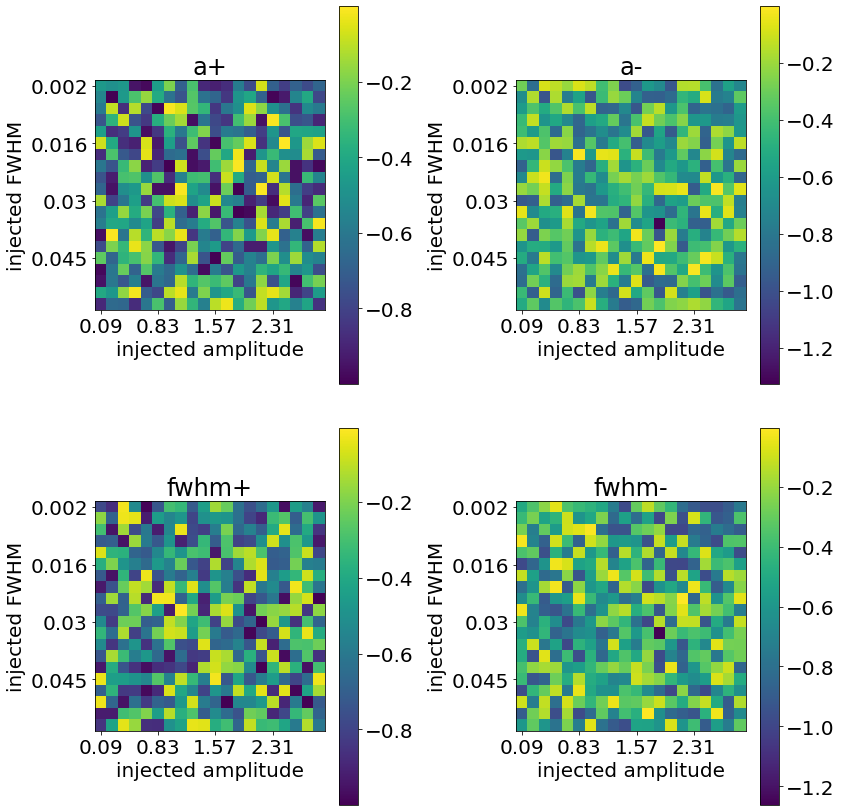

In [9]:
# Now show the Q-table after the Fairy ran across the parameter space
# increment / decrement amplitude
# increment / decrement FWHM

fig, Axes = plt.subplots(nrows=2, ncols=2, figsize=(12,12))
axes = [_ for a in Axes for _ in a]
for i,la in enumerate(["a+","a-","fwhm+","fwhm-"]):
    
    pos = axes[i].imshow(fairy.q_table[:,:,i])
    axes[i].set_xticks(np.arange(0,fairy.q_table.shape[0],5))
    axes[i].set_xticklabels(np.round(np.linspace(fairy.amin,fairy.amax, fairy.q_table.shape[0]//5),2))
    axes[i].set_yticks(np.arange(0,fairy.q_table.shape[1],5))
    axes[i].set_yticklabels(np.round(np.linspace(fairy.dmin,fairy.dmax, fairy.q_table.shape[1]//5),3))
    axes[i].set_xlabel("injected amplitude")
    axes[i].set_ylabel("injected FWHM")
    axes[i].set_title(la)
    fig.colorbar(pos, ax=axes[i])
plt.tight_layout()